# **ANÁLISIS ESTADÍSTICO DESCRIPTIVO - TABLA RELACIONAL**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

In [2]:
# Cargar los datasets
clientes = pd.read_csv('../Base_de_datos_limpia/Clientes_limpio.csv')
ventas = pd.read_csv('../Base_de_datos_limpia/Ventas_limpio.csv')
detalle_ventas = pd.read_csv('../Base_de_datos_limpia/Detalle_ventas_limpio.csv')
productos = pd.read_csv('../Base_de_datos_limpia/Productos_limpio.csv')

# 1. Unir Ventas con Clientes (para tener info del cliente en cada venta)
ventas_clientes = pd.merge(ventas, clientes, on='id_cliente', how='left')

# 2. Unir Detalle de Ventas con Productos (para tener info del producto)
detalle_productos = pd.merge(detalle_ventas, productos, on='id_producto', how='left')

# 3. Unir todo junto: Ventas + Clientes + Detalle + Productos
analisis_relacional = pd.merge(detalle_productos, ventas_clientes, on='id_venta', how='left')

# Ahora analisis_relacional contiene:
# - Datos del cliente (nombre, ciudad, fecha_alta)
# - Datos de la venta (fecha, año, mes, método de pago)
# - Datos del producto (nombre, categoría, precio)
# - Detalle de cantidad e importe
print(analisis_relacional.head())


   id_venta  id_producto  cantidad  precio_unitario_x  importe  \
0         1           90         1               2902     2902   
1         2           82         5               2394    11970   
2         2           39         5                469     2345   
3         2           70         2               4061     8122   
4         2           22         1               2069     2069   

         nombre_producto  precio_unitario_y  cat_Alimentos  cat_Limpieza  \
0    Toallas Húmedas X50               2902              0             1   
1  Aceitunas Negras 200G               2394              0             1   
2     Helado Vainilla 1L                469              1             0   
3           Fernet 750Ml               4061              0             1   
4  Medialunas De Manteca               2069              0             1   

        fecha  ...  mes_venta  pago_Efectivo  pago_Qr  pago_Tarjeta  \
0  2024-06-19  ...          6              0        0             1   
1  2

## ***Inspección general***

In [5]:
print("Primeras filas del dataset relacional:")
display(analisis_relacional.head())

print("\nInformación general:")
print(analisis_relacional.info())

Primeras filas del dataset relacional:


,id_venta,id_producto,cantidad,precio_unitario_x,importe,nombre_producto,precio_unitario_y,cat_Alimentos,cat_Limpieza,fecha,...,mes_venta,pago_Efectivo,pago_Qr,pago_Tarjeta,pago_Transferencia,nombre_cliente,email,ciudad,fecha_alta,mes_alta
0,1,90,1,2902,2902,Toallas Húmedas X50,2902,0,1,2024-06-19,...,6,0,0,1,0,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,3
1,2,82,5,2394,11970,Aceitunas Negras 200G,2394,0,1,2024-03-17,...,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2
2,2,39,5,469,2345,Helado Vainilla 1L,469,1,0,2024-03-17,...,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2
3,2,70,2,4061,8122,Fernet 750Ml,4061,0,1,2024-03-17,...,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2
4,2,22,1,2069,2069,Medialunas De Manteca,2069,0,1,2024-03-17,...,3,0,1,0,0,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,2



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_venta            343 non-null    int64 
 1   id_producto         343 non-null    int64 
 2   cantidad            343 non-null    int64 
 3   precio_unitario_x   343 non-null    int64 
 4   importe             343 non-null    int64 
 5   nombre_producto     343 non-null    object
 6   precio_unitario_y   343 non-null    int64 
 7   cat_Alimentos       343 non-null    int64 
 8   cat_Limpieza        343 non-null    int64 
 9   fecha               343 non-null    object
 10  id_cliente          343 non-null    int64 
 11  año_venta           343 non-null    int64 
 12  mes_venta           343 non-null    int64 
 13  pago_Efectivo       343 non-null    int64 
 14  pago_Qr             343 non-null    int64 
 15  pago_Tarjeta        343 non-null    int64 
 16  pago

## ***Estadísticas descriptivas generales***

In [6]:
# Asegurarse que columnas numéricas sean tipo float/int
cols_numericas = ['cantidad','precio_unitario_x','importe']
for col in cols_numericas:
    analisis_relacional[col] = pd.to_numeric(analisis_relacional[col], errors='coerce')

analisis_relacional = analisis_relacional.dropna(subset=cols_numericas)

print("\n📊 Estadísticas descriptivas generales:")
display(analisis_relacional[cols_numericas].describe())



📊 Estadísticas descriptivas generales:


,cantidad,precio_unitario_x,importe
count,343.000000,343.000000,343.000000
mean,2.962099,2654.495627,7730.078717
std,1.366375,1308.694720,5265.543077
min,1.000000,272.000000,272.000000
25%,2.000000,1618.500000,3489.000000
50%,3.000000,2512.000000,6702.000000
75%,4.000000,3876.000000,10231.500000
max,5.000000,4982.000000,24865.000000


## ***Top productos por cantidad e importe***


Top 10 productos por cantidad vendida:
nombre_producto
Salsa De Tomate 500G          27
Queso Rallado 150G            26
Hamburguesas Congeladas X4    24
Vino Blanco 750Ml             22
Aceitunas Verdes 200G         22
Mermelada De Frutilla 400G    21
Lavandina 1L                  21
Ron 700Ml                     21
Pizza Congelada Muzzarella    20
Yerba Mate Suave 1Kg          20
Name: cantidad, dtype: int64

Top 10 productos por importe total:
nombre_producto
Desodorante Aerosol           93800
Queso Rallado 150G            89544
Pizza Congelada Muzzarella    85720
Ron 700Ml                     81396
Yerba Mate Suave 1Kg          77560
Energética Nitro 500Ml        71706
Chicle Menta                  68628
Caramelos Masticables         66528
Vino Blanco 750Ml             59048
Hamburguesas Congeladas X4    58080
Name: importe, dtype: int64


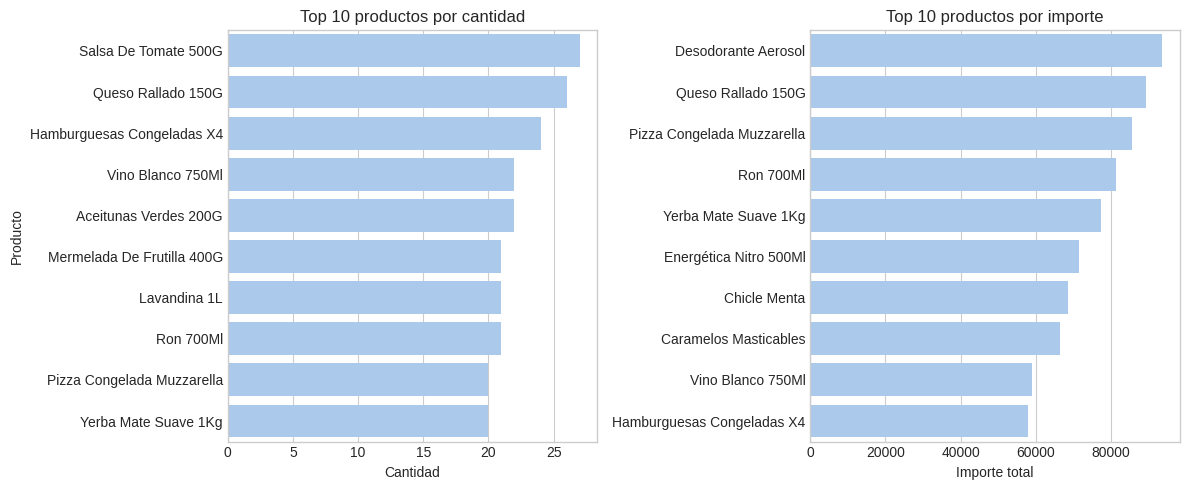

In [ ]:
top_productos_cantidad = analisis_relacional.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=False).head(10)
top_productos_importe = analisis_relacional.groupby('nombre_producto')['importe'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 productos por cantidad vendida:")
print(top_productos_cantidad)

print("\nTop 10 productos por importe total:")
print(top_productos_importe)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=top_productos_cantidad.values, y=top_productos_cantidad.index)
plt.title('Top 10 productos por cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Producto')

plt.subplot(1,2,2)
sns.barplot(x=top_productos_importe.values, y=top_productos_importe.index)
plt.title('Top 10 productos por importe')
plt.xlabel('Importe total')
plt.ylabel('')
plt.tight_layout()
plt.show()

**El gráfico de la izquierda muestra los 10 productos más populares (más vendidos en cantidad de unidades), mientras que el gráfico de la derecha muestra los 10 productos más rentables (los que generaron mayor ingreso total).**

**Estos gráficos permiten ver que el producto más vendido (Salsa de Tomate) no es necesariamente el que más dinero genera (Desodorante Aerosol).**

## ***Top clientes por gasto total***


Top 10 clientes por gasto total:
nombre_cliente
Agustina Flores       132158
Bruno Castro          118790
Bruno Diaz             90701
Diego Diaz             90522
Karina Castro          81830
Mariana Lopez          72448
Olivia Gomez           71321
Guadalupe Martinez     67959
Pablo Sanchez          67575
Camila Rodriguez       65001
Name: importe, dtype: int64


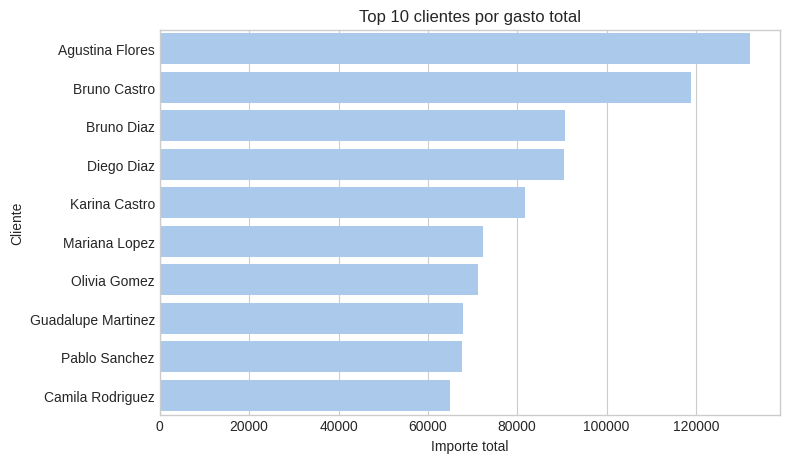

In [ ]:
gasto_por_cliente = analisis_relacional.groupby('nombre_cliente')['importe'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 clientes por gasto total:")
print(gasto_por_cliente)

plt.figure(figsize=(8,5))
sns.barplot(x=gasto_por_cliente.values, y=gasto_por_cliente.index)
plt.title('Top 10 clientes por gasto total')
plt.xlabel('Importe total')
plt.ylabel('Cliente')
plt.show()

**Este gráfico identifica a los 10 clientes que más dinero han gastado en el negocio, ordenándolos por su "Importe total". Permite ver de forma sencilla quiénes son los clientes más importantes en términos de ingresos, destacando a "Agustina Flores" como la clienta número uno.**

## ***Distribución por ciudad y categoría***


Ventas por ciudad:
ciudad
Rio Cuarto     792203
Alta Gracia    481504
Cordoba        481482
Carlos Paz     353852
Villa Maria    313350
Mendiolaza     229026
Name: importe, dtype: int64

Ventas por categoría Alimentos (0=No,1=Sí):
cat_Alimentos
0    1436281
1    1215136
Name: importe, dtype: int64

Ventas por categoría Limpieza (0=No,1=Sí):
cat_Limpieza
0    1215136
1    1436281
Name: importe, dtype: int64


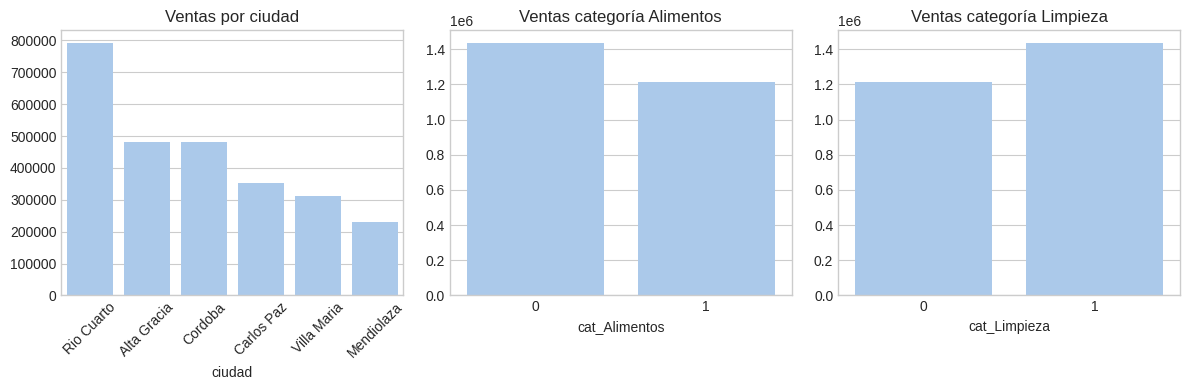

In [9]:
ventas_por_ciudad = analisis_relacional.groupby('ciudad')['importe'].sum().sort_values(ascending=False)
ventas_alimentos = analisis_relacional.groupby('cat_Alimentos')['importe'].sum()
ventas_limpieza = analisis_relacional.groupby('cat_Limpieza')['importe'].sum()

print("\nVentas por ciudad:")
print(ventas_por_ciudad)
print("\nVentas por categoría Alimentos (0=No,1=Sí):")
print(ventas_alimentos)
print("\nVentas por categoría Limpieza (0=No,1=Sí):")
print(ventas_limpieza)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values)
plt.xticks(rotation=45)
plt.title('Ventas por ciudad')

plt.subplot(1,3,2)
sns.barplot(x=ventas_alimentos.index, y=ventas_alimentos.values)
plt.title('Ventas categoría Alimentos')

plt.subplot(1,3,3)
sns.barplot(x=ventas_limpieza.index, y=ventas_limpieza.values)
plt.title('Ventas categoría Limpieza')

plt.tight_layout()
plt.show()


**El gráfico de la izquierda ("Ventas por ciudad") muestra qué ciudades generan más ingresos, siendo "Río Cuarto" la más importante.**

**Los dos gráficos de la derecha comparan las ventas totales de las categorías "Alimentos" y "Limpieza".**

## ***Métodos de pago***


Número de ventas por método de pago:
pago_Efectivo         111
pago_Qr                91
pago_Tarjeta           69
pago_Transferencia     72
dtype: int64


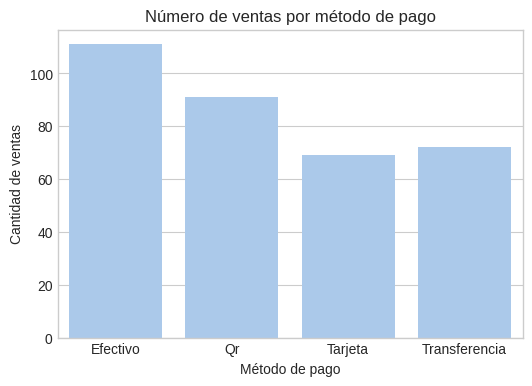

In [21]:

metodos_pago = ['pago_Efectivo','pago_Qr','pago_Tarjeta','pago_Transferencia']
ventas_por_metodo = analisis_relacional[metodos_pago].sum()

print("\nNúmero de ventas por método de pago:")
print(ventas_por_metodo)

plt.figure(figsize=(6,4))
sns.barplot(x=ventas_por_metodo.index.str.replace('pago_',''), y=ventas_por_metodo.values)
plt.title('Número de ventas por método de pago')
plt.ylabel('Cantidad de ventas')
plt.xlabel('Método de pago')
plt.show()

**Este gráfico de barras compara la popularidad de los diferentes métodos de pago, mostrando cuántas ventas individuales se realizaron con cada uno. Se puede ver que el "Efectivo" es el método más frecuente (más de 100 ventas), seguido por "Qr", mientras que "Tarjeta" y "Transferencia" son los menos comunes.**

## ***Tendencias temporales***

Text(0, 0.5, 'Importe total')

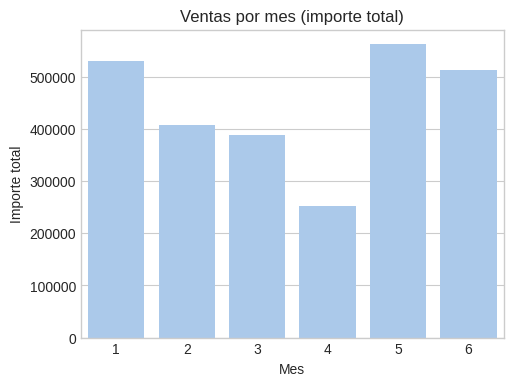

In [12]:
# Total de ventas por mes
ventas_por_mes = analisis_relacional.groupby('mes_venta')['importe'].sum()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title('Ventas por mes (importe total)')
plt.xlabel('Mes')
plt.ylabel('Importe total')

**Este gráfico muestra el importe total de las ventas para cada uno de los primeros seis meses. Permite comparar el rendimiento entre ellos, identificando fácilmente el mes con más ventas (el 5) y el mes con menos ventas (el 4).**

## ***Scatter plots para explorar relaciones***

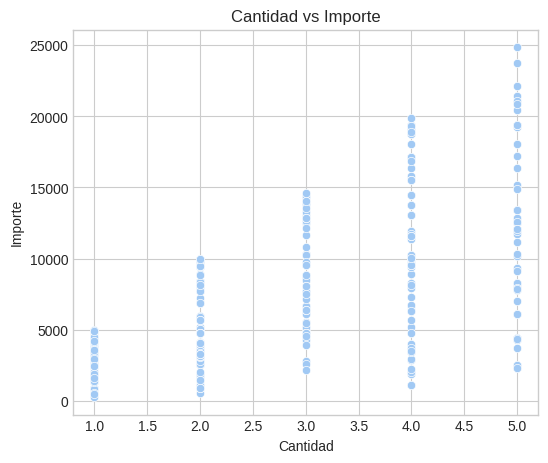

In [3]:
# Cantidad vs Importe
plt.figure(figsize=(6,5))
sns.scatterplot(x='cantidad', y='importe', data=analisis_relacional)
plt.title('Cantidad vs Importe')
plt.xlabel('Cantidad')
plt.ylabel('Importe')
plt.show()

**El primer gráfico de dispersión muestra la relación entre la cantidad de productos comprados (en el eje X) y el importe total de esas compras (en el eje Y). Se puede ver que las cantidades son números enteros (1, 2, 3, 4, 5) y que para cada cantidad existe una variedad de importes diferentes, aunque tienden a ser más altos a medida que aumenta la cantidad. La dispersión vertical de los puntos indica que, aunque la cantidad sea la misma, el Precio unitario es diferente en cada transacción.**

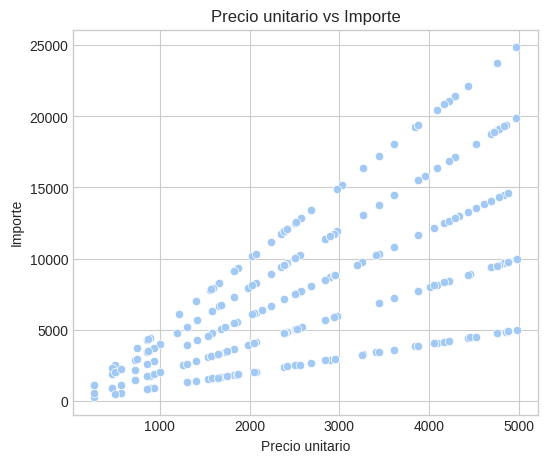

In [4]:
# Precio unitario vs Importe
plt.figure(figsize=(6,5))
sns.scatterplot(x='precio_unitario_x', y='importe', data=analisis_relacional)
plt.title('Precio unitario vs Importe')
plt.xlabel('Precio unitario')
plt.ylabel('Importe')
plt.show()

**El segundo gráfico de dispersión relaciona el precio unitario de un artículo (en el eje X) con el importe total de la transacción (en el eje Y). Lo más interesante es que los puntos forman líneas rectas diagonales muy claras. Cada una de esas líneas representa una cantidad específica de artículos comprados; la línea inferior son compras de 1 artículo (donde Importe = Precio unitario * 1), la siguiente línea son compras de 2 artículos (Importe = Precio unitario * 2), y así sucesivamente.**

## ***Histogramas de variables numéricas***

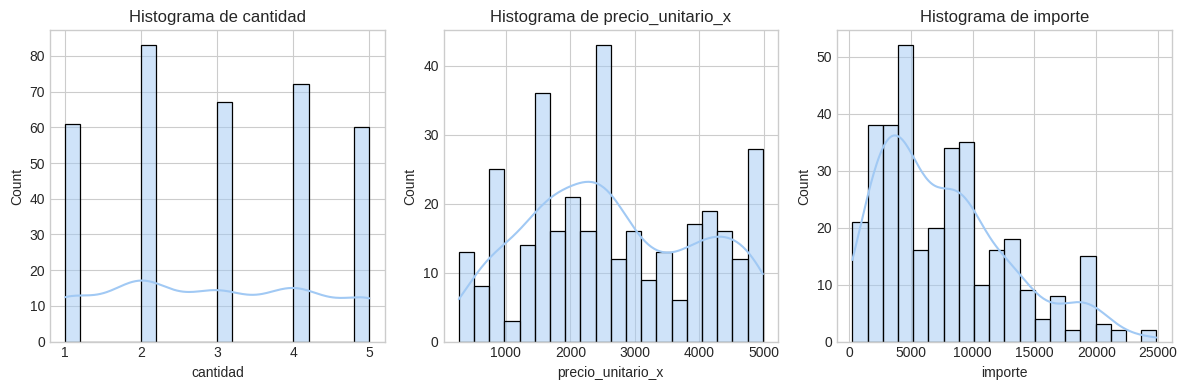

In [14]:
cols_numericas = ['cantidad', 'precio_unitario_x', 'importe']

plt.figure(figsize=(12,4))
for i, col in enumerate(cols_numericas):
    plt.subplot(1,3,i+1)
    sns.histplot(analisis_relacional[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

***1. Histograma de cantidad:***
- **Nos dice cuántas ventas totales (el eje Y, "Count") se hicieron para cada cantidad de producto (el eje X: 1, 2, 3, 4, o 5). Podemos ver la frecuencia de cada cantidad. Por ejemplo, la barra en "1" nos dice cuántas transacciones incluyeron solo un artículo.**

***2. Histograma de precio_unitario_x:***
- **Este gráfico toma todos los precios unitarios y los agrupa en rangos (las barras). Nos dice qué rangos de precios son los más comunes. La distribución no es simple. Tiene varios "picos". Hay un grupo grande de productos con precios bajos (alrededor de 1000), otro grupo notable (alrededor de 2500) y algunos picos más pequeños a precios más altos.**

***3. Histograma de importe:***
- **Este nos dice cuántas ventas cayeron en diferentes rangos del importe total (por ejemplo, cuántas ventas fueron entre 0 y 2500, cuántas entre 2500 y 5000, etc.). La gran mayoría de las ventas están agrupadas en la izquierda, en los importes más bajos. A medida que el importe total aumenta (hacia la derecha), hay cada vez menos ventas. Esto se llama sesgo a la derecha.**

## ***Boxplots por categorías***

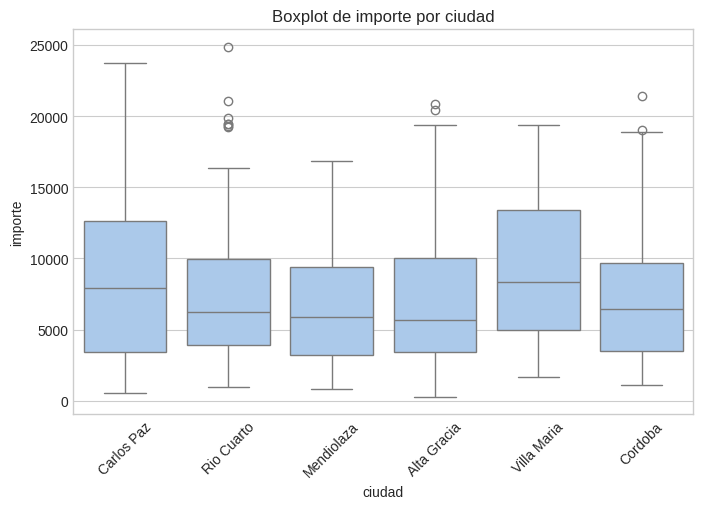

In [5]:
# 1. Importe por ciudad
plt.figure(figsize=(8,5))
sns.boxplot(x='ciudad', y='importe', data=analisis_relacional)
plt.title('Boxplot de importe por ciudad')
plt.xticks(rotation=45)
plt.show()

***Lo que muestra cada caja:***
- **Línea horizontal: Es la mediana (o el percentil 50). La mitad de las ventas de esa ciudad están por encima y la otra mitad por debajo de ese valor.**
- **La caja: Representa el 50% central de todas las ventas.**
- **Los puntos (Outliers): Son valores atípicos o ventas esporádicamente muy grandes (o muy pequeñas) que se salen del patrón normal.**

***Comparación de Ciudades***
- **Carlos Paz y Villa María generalmente tienen las ventas más grandes, ya que sus medianas son las más altas (la línea central está más arriba).**
- **Río Cuarto, Cordoba y Alta Gracia tienen una alta concentración de valores atípicos, lo que significa que de vez en cuando tienen ventas mucho más grandes que el resto de sus transacciones.**

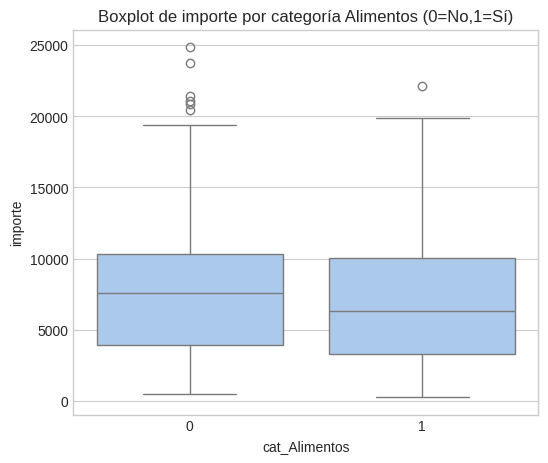

In [6]:
# 2. Importe por categoría Alimentos
plt.figure(figsize=(6,5))
sns.boxplot(x='cat_Alimentos', y='importe', data=analisis_relacional)
plt.title('Boxplot de importe por categoría Alimentos (0=No,1=Sí)')
plt.show()

**Este diagrama de caja compara el importe total de las ventas (eje Y) basándose en si la transacción contenía productos de la categoría Alimentos (eje X: 0=No y 1=Sí).**
- **Mediana (línea central): El valor de venta típico (la mediana) de las transacciones sin alimentos (0) es ligeramente más alto que el de las transacciones con alimentos (1).**
- **Dispersión (la caja): El 50% central de las ventas sin alimentos (0) tiene una dispersión ligeramente mayor.**
- **Valores Extremos (puntos): Ambos grupos tienen valores atípicos (ventas muy grandes), pero la categoría sin alimentos (0) tiene las ventas más grandes registradas (cerca de 25.000) y más casos de ventas extremas.**

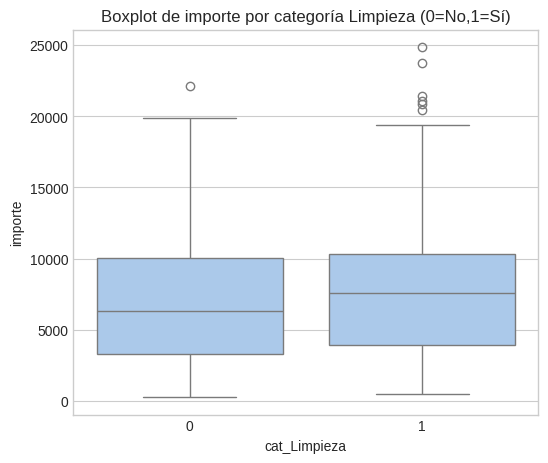

In [7]:
# 3. Importe por categoría Limpieza
plt.figure(figsize=(6,5))
sns.boxplot(x='cat_Limpieza', y='importe', data=analisis_relacional)
plt.title('Boxplot de importe por categoría Limpieza (0=No,1=Sí)')
plt.show()


**Este diagrama de caja compara el importe total de las ventas (eje Y) según si la transacción incluye o no productos de la categoría Limpieza (0=No, 1=Sí).**
- **Mediana (Línea central): La venta típica (mediana) de las transacciones que sí incluyen artículos de limpieza (1) es más alta que la de las que no los incluyen (0). Esto sugiere que la inclusión de productos de limpieza tiende a aumentar ligeramente el valor total de la venta.**
- **Dispersión (Caja): El 50% central de las ventas para la categoría con limpieza (1) se encuentra en un rango de valores más altos que el grupo sin limpieza (0).**
- **Valores Extremos (Outliers): Ambos grupos tienen ventas excepcionalmente grandes, pero el grupo con limpieza (1) registra los importes más altos de manera ocasional.**

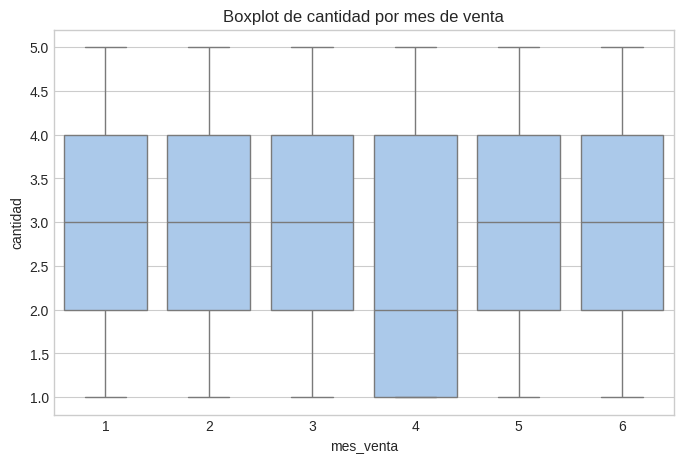

In [8]:
# 4. Cantidad por mes de venta
plt.figure(figsize=(8,5))
sns.boxplot(x='mes_venta', y='cantidad', data=analisis_relacional)
plt.title('Boxplot de cantidad por mes de venta')
plt.show()

**Este diagrama de caja (Boxplot) compara la distribución de la cantidad de artículos vendidos por transacción (eje Y) a lo largo de los seis meses (eje X).**

**Análisis de la Cantidad de Artículos por Mes:**
- **Similitud (Mediana): La característica más notable es la uniformidad. La cantidad mediana vendida por transacción (la línea central) es de 3 unidades en todos los meses (1 al 6).**
- **Diferencia (Dispersión): El mes 4 se destaca. Aunque su mediana es la misma, su caja (el 50% central de las ventas) es mucho más ancha y baja que las demás.**
- **En la mayoría de los meses (1, 2, 3, 5, 6), el 50% central de las ventas se encuentra entre 2 y 4 unidades.**
- **En el mes 4, el 50% central de las ventas se extiende entre 1 y 4 unidades.**

**Conclusión:**
- **La caja más ancha del mes 4 indica una mayor variabilidad o dispersión en las cantidades vendidas en ese mes. Muestra que, si bien la cantidad más común (mediana) sigue siendo 3, las ventas en el mes 4 fueron más propensas a incluir solo 1 artículo que en cualquier otro mes.**

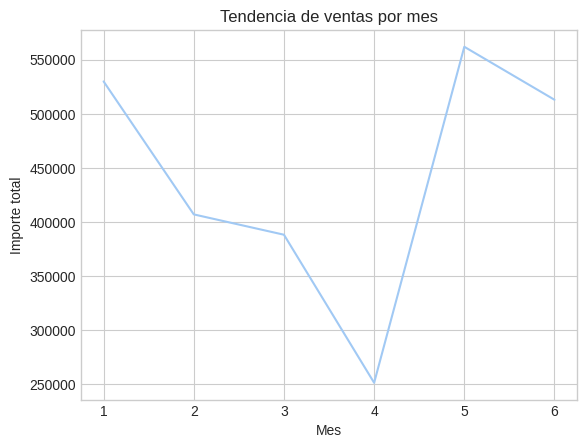

In [20]:
# Total de ventas por mes
ventas_por_mes = analisis_relacional.groupby('mes_venta')['importe'].sum()
sns.lineplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title('Tendencia de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Importe total')
plt.show()


**Este gráfico de líneas muestra la evolución de las ventas totales (importe total) a lo largo de los seis meses, lo que es ideal para identificar rápidamente la tendencia y los cambios a lo largo del tiempo.**

**Tendencia observada:**
- **Declive Inicial:** Las ventas comienzan altas en el Mes 1 y caen progresivamente hasta alcanzar el punto más bajo en el Mes 4 (aproximadamente 250.000).
- **Pico Dramático:** A esto le sigue un aumento muy drástico en el Mes 5, donde se registra el pico máximo de ventas para todo el período (aproximadamente 560.000).
- **Cierre:** El período termina con una ligera disminución en el Mes 6.

**Esta visualización es la contraparte en formato de tendencia del primer gráfico de barras que analizamos.**

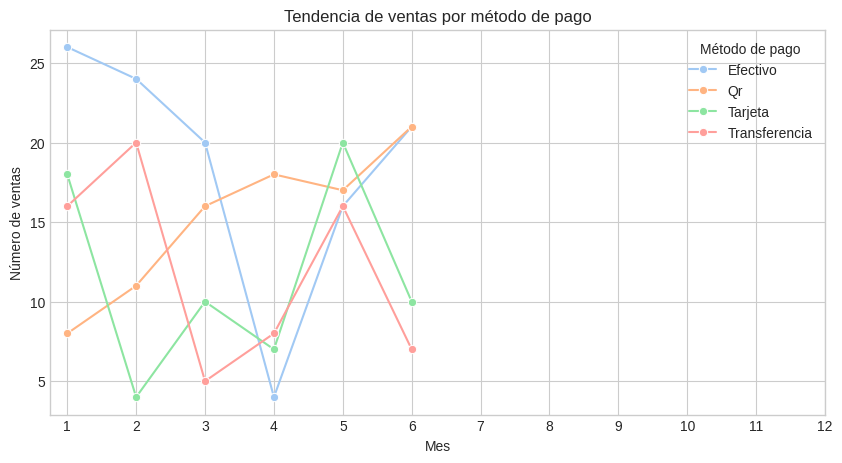

In [24]:
# Agrupar por mes y sumar ventas por método de pago
pagos_por_mes = analisis_relacional.groupby('mes_venta')[['pago_Efectivo','pago_Qr','pago_Tarjeta','pago_Transferencia']].sum()

# Gráfico de tendencia
plt.figure(figsize=(10,5))
for metodo in pagos_por_mes.columns:
    sns.lineplot(
        x=pagos_por_mes.index,
        y=pagos_por_mes[metodo],
        label=metodo.replace('pago_',''),
        marker='o'   # <-- Esto agrega los puntos
    )
    
plt.title('Tendencia de ventas por método de pago')
plt.xlabel('Mes')
plt.ylabel('Número de ventas')
plt.xticks(range(1,13))
plt.legend(title='Método de pago')
plt.show()


**Este gráfico de líneas muestra la evolución de la cantidad de ventas (eje Y) a lo largo de los seis meses para los cuatro métodos de pago (la leyenda). Es excelente para ver cómo la preferencia de pago ha cambiado con el tiempo.**

**Tendencias Clave por Método de Pago:**
- **Efectivo (Azul Claro):** Comienza como el método claramente dominante en el Mes 1. Sin embargo, su uso decae drásticamente hasta el Mes 4, para luego repuntar ligeramente, mostrando una clara tendencia a la baja en la preferencia.
- **QR (Naranja):** Muestra una tendencia general de crecimiento constante a lo largo del periodo, pasando de ser el menos usado en el Mes 1 a convertirse en el método más frecuente en el Mes 6.
- **Tarjeta (Verde) y Transferencia (Rosa):** Ambos métodos son los más volátiles, experimentando picos y caídas muy pronunciadas, lo que sugiere un uso menos estable o más dependiente de factores puntuales.